GNN model trained.
Starting real-time systemic risk monitoring...
Transaction 1: Bank2 -> Bank3, Amount=₹574.57, Max Risk Score=0.09
Transaction 2: Bank5 -> Bank1, Amount=₹1823.90, Max Risk Score=0.09
Transaction 3: Bank3 -> Bank1, Amount=₹1238.87, Max Risk Score=0.10
Transaction 4: Bank5 -> Bank2, Amount=₹1058.01, Max Risk Score=0.09
Transaction 5: Bank1 -> Bank5, Amount=₹1166.97, Max Risk Score=0.09


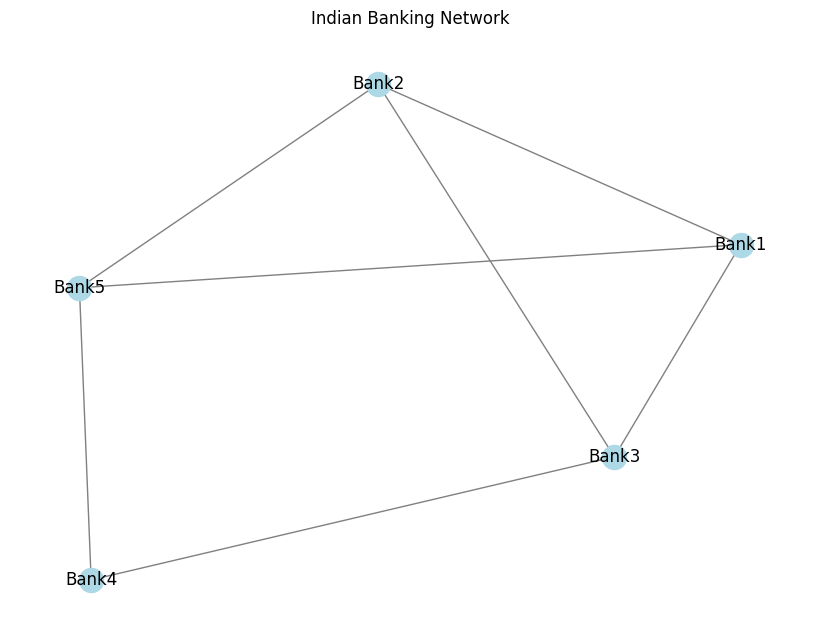

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import networkx as nx
import torch
import torch_geometric
from torch_geometric.nn import GCNConv
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Simulate synthetic banking network (replace with RBI data if available)
# Download Kaggle dataset: https://www.kaggle.com/datasets/shivamb/synthetic-financial-datasets-for-fraud-detection
G = nx.Graph()
banks = ['Bank1', 'Bank2', 'Bank3', 'Bank4', 'Bank5']
G.add_nodes_from(banks)
edges = [('Bank1', 'Bank2', {'weight': 1000}), ('Bank2', 'Bank3', {'weight': 1500}),
         ('Bank3', 'Bank4', {'weight': 2000}), ('Bank4', 'Bank5', {'weight': 1200}),
         ('Bank5', 'Bank1', {'weight': 800})]
G.add_edges_from(edges)

# Convert to PyTorch Geometric data
from torch_geometric.utils import from_networkx
data = from_networkx(G)
node_features = np.random.rand(len(banks), 5)  # Simulated node features (e.g., capital, assets)
data.x = torch.tensor(node_features, dtype=torch.float)
data.y = torch.tensor([0] * len(banks), dtype=torch.long)  # Placeholder labels (0: normal)

# Define simple GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(5, 16)
        self.conv2 = GCNConv(16, 2)  # Output: normal or risky

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return torch.softmax(x, dim=1)

# Initialize and train GNN
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()
for epoch in range(10):  # Simplified training for demo
    optimizer.zero_grad()
    out = model(data)
    loss = torch.nn.functional.cross_entropy(out, data.y)
    loss.backward()
    optimizer.step()
print("GNN model trained.")

# Simulate real-time transaction stream
def simulate_realtime_transactions(n_transactions=5):
    print("Starting real-time systemic risk monitoring...")
    for i in range(n_transactions):
        # Simulate new transaction (edge weight update)
        source, target = np.random.choice(banks, 2, replace=False)
        weight = np.random.uniform(500, 2000)
        G.add_edge(source, target, weight=weight)
        
        # Update PyTorch Geometric data
        data = from_networkx(G)
        data.x = torch.tensor(node_features, dtype=torch.float)
        
        # Predict risk
        model.eval()
        with torch.no_grad():
            out = model(data)
            risk_scores = out[:, 1].numpy()  # Probability of being risky
        
        print(f"Transaction {i+1}: {source} -> {target}, Amount=₹{weight:.2f}, Max Risk Score={max(risk_scores):.2f}")
        time.sleep(1)

# Run simulation
simulate_realtime_transactions(n_transactions=5)

# Visualize network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Indian Banking Network")
plt.show()

# For real-time RBI data:
# 1. Access RBI Financial Stability Reports: https://www.rbi.org.in/Scripts/BS_ViewMasNotice.aspx
# 2. Extract interbank exposure data (if available) and update the network dynamically.